In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
c=pd.read_csv('1000_Companies.csv')
X=c.iloc[:,:-1].values
y=c.iloc[:,4].values

c.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
l=LabelEncoder()
X[:,3]=l.fit_transform(X[:,3])
o=OneHotEncoder()
X=o.fit_transform(X).toarray()


In [8]:
X=X[:,1:]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
r=LinearRegression()
r.fit(x_train,y_train)


LinearRegression()

In [18]:
y_pred=r.predict(x_test)
print(y_pred)
print(r.coef_)
print(r.intercept_)


[119054.14630704 119054.09103073 119054.08019812 118671.30631487
 117833.51874439 117833.69516389 117833.23599976 119054.42131466
 117833.58131927 118671.8871097  119054.27004933 118673.52413023
 119054.21584835 119054.0797724  119054.15260038 117833.54050228
 118671.58990384 119054.15260038 118671.75932635 117833.58131927
 117833.56604966 119054.16753318 118671.30631487 119054.21825793
 119054.07016334 119054.08743946 117833.63879107 117833.63202413
 119054.07775015 119054.15260038 118671.57359132 119053.86049829
 117833.46717464 118671.25914756 119054.37790478 119053.99927993
 117833.58131927 118671.30631487 118671.30631487 118671.06690234
 117833.55054978 119054.15260038 119054.08718776 118671.27939697
 118671.6379695  119053.91221023 118671.3121397  118671.1035823
 118671.31115078 118671.27527528 118671.30631487 118671.30631487
 119054.12221387 117833.58589553 179419.4545044  118671.30717108
 118671.08290404 117833.58131927 117833.3755684  117833.49744144
 118671.20950331 117833.60

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.0031470683172161174

In [24]:
from sklearn.datasets import load_digits
import seaborn as sns
digits=load_digits()

print("image data shape",digits.data.shape)
print("label data shape",digits.target.shape)

image data shape (1797, 64)
label data shape (1797,)


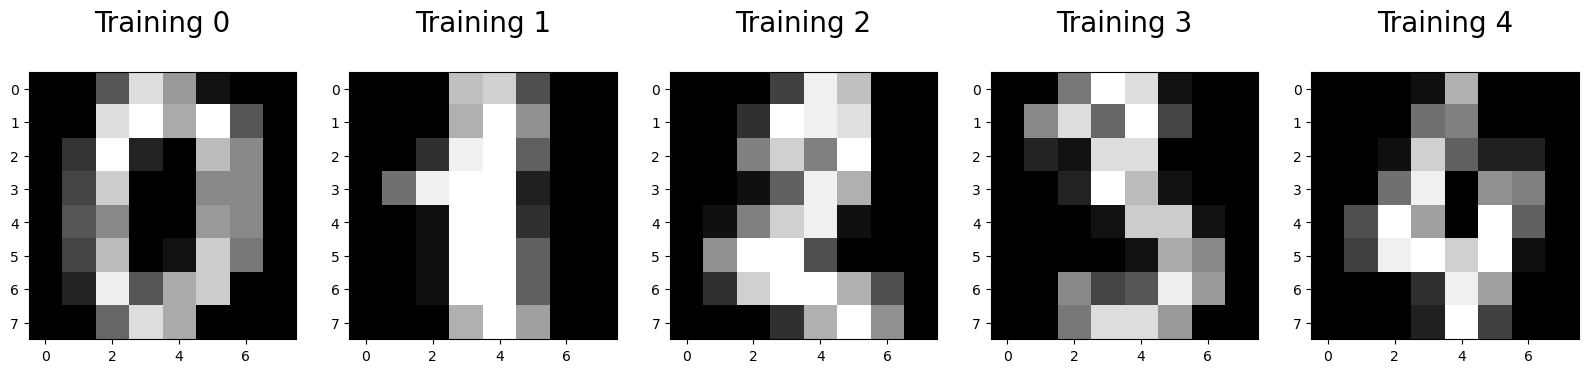

In [26]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training %i\n'%label,fontsize=20)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1383, 64)
(1383,)
(414, 64)
(414,)


In [30]:
from sklearn.linear_model import LogisticRegression
r=LogisticRegression()
r.fit(x_train,y_train)

C:\Users\chafl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
print(r.predict(x_test[0].reshape(1,-1)))

[4]


In [48]:
r.predict(x_test[0:10])


array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [49]:
predictions=r.predict(x_test)
score=r.score(x_test,y_test)
import matplotlib.pyplot as plt
from sklearn import metrics

In [41]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


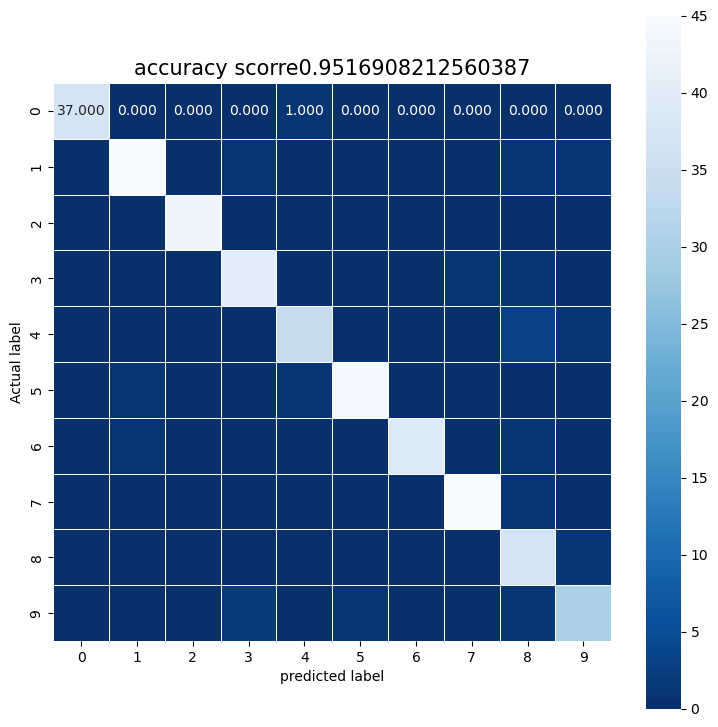

In [52]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('predicted label');
all_sample_title='accuracy scorre{0}'.format(score)
plt.title(all_sample_title,size=15);